In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import plotly.graph_objs as go
%matplotlib inline
from random import sample
import seaborn as sns
import datetime as dt
from pandas_datareader import data as pdr
from dataclasses import dataclass

In [129]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [130]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

### SPX

In [131]:
start = dt.date(1999, 11, 20)
end = dt.date(2022, 11, 22)
spx =pdr.get_data_yahoo('^GSPC',start=start,end=end)

In [132]:
spx_ffill = spx.resample('d').asfreq().ffill() 
spx_mon = spx_ffill[spx_ffill.index.dayofweek==0][:-1]
spx_thur = spx_ffill[spx_ffill.index.dayofweek==3]
spx_fri = spx_ffill[spx_ffill.index.dayofweek==4]
spx_mon.index = spx_mon.index + pd.Timedelta(4, 'd')
spx_thur.index = spx_thur.index + pd.Timedelta(1, 'd')

In [133]:
spx_fri['spx_return'] = np.log(spx_fri['Open']/spx_fri['Adj Close'].shift(1)).fillna(0)
spx_fri['spx_volume_return'] =np.log(spx_thur['Volume']/spx_mon['Volume'])
spx_fri = spx_fri.fillna(0)
spx_fri

<ipython-input-133-9ed575aeaa8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_fri['spx_return'] = np.log(spx_fri['Open']/spx_fri['Adj Close'].shift(1)).fillna(0)
<ipython-input-133-9ed575aeaa8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx_fri['spx_volume_return'] =np.log(spx_thur['Volume']/spx_mon['Volume'])


,High,Low,Open,Close,Volume,Adj Close,spx_return,spx_volume_return
Date,,,,,,,,
1999-11-19,1424.939941,1417.540039,1424.939941,1422.000000,8.938000e+08,1422.000000,0.000000,0.000000
1999-11-26,1425.239990,1416.140015,1417.079956,1416.619995,3.121200e+08,1416.619995,-0.003466,-0.172910
1999-12-03,1447.420044,1409.040039,1409.040039,1433.300049,1.006400e+09,1433.300049,-0.005365,0.039172
1999-12-10,1421.579956,1405.650024,1408.109985,1417.040039,9.872000e+08,1417.040039,-0.017731,0.202068
1999-12-17,1431.770020,1418.780029,1418.780029,1421.030029,1.349800e+09,1421.030029,0.001227,0.090594
...,...,...,...,...,...,...,...,...
2022-10-21,3757.889893,3647.419922,3657.100098,3752.750000,5.078020e+09,3752.750000,0.020451,0.032511
2022-10-28,3905.419922,3808.260010,3808.260010,3901.060059,4.459410e+09,3901.060059,0.014683,-0.012848
2022-11-04,3796.340088,3708.840088,3766.979980,3770.550049,5.400180e+09,3770.550049,-0.034975,-0.041363


### VIX

In [134]:
start = dt.date(1999, 11, 20)
end = dt.date(2022, 11, 22)
vix =pdr.get_data_yahoo('^VIX',start=start,end=end)
vix_ffill = vix.resample('d').asfreq().ffill() 

In [135]:
vix_mon = vix_ffill[vix_ffill.index.dayofweek==0][:-1]
vix_thur = vix_ffill[vix_ffill.index.dayofweek==3]
vix_fri = vix_ffill[vix_ffill.index.dayofweek==4]
vix_mon.index = vix_mon.index + pd.Timedelta(4, 'd')
vix_thur.index = vix_thur.index + pd.Timedelta(1, 'd')

In [136]:
vix_fri['vix_return'] = np.log(vix_thur['Adj Close']/vix_mon['Adj Close'])
vix_fri = vix_fri.fillna(0)
vix_fri

<ipython-input-136-4012137d9bb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_fri['vix_return'] = np.log(vix_thur['Adj Close']/vix_mon['Adj Close'])


,High,Low,Open,Close,Volume,Adj Close,vix_return
Date,,,,,,,
1999-11-19,19.799999,18.639999,18.799999,19.110001,0.0,19.110001,0.000000
1999-11-26,23.469999,20.219999,20.350000,22.330000,0.0,22.330000,0.013917
1999-12-03,19.820000,18.690001,19.740000,19.320000,0.0,19.320000,-0.079442
1999-12-10,22.150000,21.030001,21.610001,21.480000,0.0,21.480000,0.029210
1999-12-17,21.459999,20.840000,21.389999,21.350000,0.0,21.350000,0.008710
...,...,...,...,...,...,...,...
2022-10-21,30.440001,29.240000,30.209999,29.690001,0.0,29.690001,-0.045322
2022-10-28,27.590000,25.750000,27.430000,25.750000,0.0,25.750000,-0.086007
2022-11-04,25.709999,24.000000,25.629999,24.549999,0.0,24.549999,-0.022666


### Technical Indicators

In [137]:
def EWMA(df, n):
    EWMA = pd.Series(df["Open"].ewm(span=n).mean(),name = "EWMA_" + str(n))
    return EWMA

vix_fri['EWMA_1'] = EWMA(vix_fri,1)
vix_fri['EWMA_2'] = EWMA(vix_fri,2)
vix_fri['EWMA_3'] = EWMA(vix_fri,3)
vix_fri['EWMA_4'] = EWMA(vix_fri,4)

In [138]:
def EWMV(df, n):
    EWMV = pd.Series(df["spx_return"].ewm(span=n).mean(),name = "EWMV_" + str(n))
    return EWMV

spx_fri['EWMV_2'] = EWMV(spx_fri,2)

In [139]:
def ATR(n):
    ATR = pd.concat([(spx_thur['High']-spx_thur['Low']),
           np.abs(spx_thur['High'] - spx_thur['Adj Close'].shift(1)),
           np.abs(spx_thur['Low']-spx_thur['Adj Close'].shift(1))],axis=1).max(axis=1).rolling(n).mean()
    return ATR

spx_fri['ATR_2'] = ATR(2)
spx_fri['ATR_4'] = ATR(4)

In [140]:
def DIV(N):
    alpha = 1.34
    k =(alpha-1)/(alpha+(N+1)/(N-1))
    c = np.log(spx_thur['Adj Close']/spx_thur['Open'])
    u = np.log(spx_thur['Adj Close']/spx_thur['Open'])
    o = np.log(spx_thur['Open']/spx_thur['Adj Close'].shift(1))
    d = np.log(spx_thur['Low']/spx_thur['Open'])
    V0 = ((o-o.rolling(N).mean())**2).rolling(N).sum()/(N-1)
    Vc = ((c-c.rolling(N).mean())**2).rolling(N).sum()/(N-1)
    Vrs = (u*(u-c)+d*(d-c)).rolling(N).mean()
    DIV = V0 + k*Vc +(1-k)*Vrs
    return DIV

spx_fri['DIV_2'] = DIV(2)
spx_fri['DIV_4'] = DIV(4)

In [141]:
spx_fri = spx_fri.loc['2001-01-05':'2022-11-11',['spx_return','spx_volume_return','EWMV_2','ATR_2','ATR_4','DIV_2','DIV_4']]
vix_fri = vix_fri.loc['2001-01-05':'2022-11-11',:]
vix_fri.drop(['Volume','Close'],axis=1,inplace=True)

<ipython-input-141-bc163f4386c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vix_fri.drop(['Volume','Close'],axis=1,inplace=True)


In [142]:
data = pd.read_csv('Features.csv',index_col=[0])
data.index = pd.to_datetime(data.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2001-01-05 to 2022-11-04
Data columns (total 27 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   SPX_Index_Volume                                                  1140 non-null   int64  
 1   TIP_US_Equity_last                                                1140 non-null   float64
 2   SPX_Index_PE_RATIO                                                1140 non-null   float64
 3   SPX_Index_TO_SALES_RATIO                                          1140 non-null   float64
 4   SPX_Index_GROSS_MARGIN                                            1140 non-null   float64
 5   SPX_Index_TO_BOOK_RATIO                                           1140 non-null   float64
 6   FEDL01 Index                                                      1140 non-null   float64
 7   HG1 COMB Comdty

In [143]:
data = data.drop(['SPX_Index_Volume','SPY_Close','SPY_Volume'],axis=1)
data

,TIP_US_Equity_last,SPX_Index_PE_RATIO,SPX_Index_TO_SALES_RATIO,SPX_Index_GROSS_MARGIN,SPX_Index_TO_BOOK_RATIO,FEDL01 Index,HG1 COMB Comdty,XAG BGN Curncy,US0003M Index,CL1 COMB Comdty,...,BXIIUB05 Index,EHUPUS Index,tnx,usd_jpy,ndx,dxy,gold,HSI,T10Y2Y,inflation
2001-01-05,55.9766,23.4211,1.7827,31.95,3.7008,4.61,77.40,4.3700,4.34000,28.94,...,100.8019,3.90,4.948,116.449997,2267.850098,108.419998,268.000000,27.27,0.37,0.101990
2001-01-12,55.9766,23.4211,1.7827,31.95,3.7008,4.61,77.40,4.3700,4.34000,28.94,...,100.8019,3.90,5.230,118.470001,2506.050049,109.360001,263.899994,27.09,0.35,0.101990
2001-01-19,55.9766,23.7309,1.9209,32.08,4.1876,5.92,84.75,4.7450,5.61125,32.19,...,100.8019,3.90,5.174,117.129997,2655.770020,110.660004,264.299988,23.11,0.44,0.101990
2001-01-26,55.9766,23.9672,1.9402,32.09,4.2279,5.96,84.00,4.8100,5.56750,29.77,...,100.8019,3.90,5.253,117.320000,2631.780029,111.459999,262.799988,24.52,0.51,0.101990
2001-02-02,55.9766,23.8414,1.9236,31.97,4.2012,5.50,84.15,4.7750,5.39750,31.19,...,100.8019,3.90,5.138,115.629997,2472.179932,110.320000,267.100006,25.93,0.52,-0.053228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07,104.7734,17.3055,2.1114,34.10,3.6276,3.08,341.25,19.0283,3.75471,79.49,...,120.5043,3.57,3.883,145.039002,11039.469730,112.800003,1700.500000,29.94,-0.41,-0.055628
2022-10-14,105.5624,17.3281,2.1051,34.08,3.6150,3.08,342.35,18.2770,4.19371,85.61,...,122.2560,3.57,4.010,147.292999,10692.059570,113.309998,1641.699951,36.35,-0.48,-0.055628
2022-10-21,105.2029,18.1487,2.2048,34.08,3.7862,3.08,347.45,19.4210,4.35843,85.05,...,122.9264,3.57,4.213,150.175995,11310.330080,112.010002,1651.000000,35.10,-0.28,-0.055628
2022-10-28,106.4114,18.8631,2.2914,34.08,3.9383,3.08,342.90,19.2595,4.43957,87.90,...,122.6782,3.57,4.010,146.274002,11546.209960,110.669998,1639.599976,39.70,-0.39,-0.055628


### SVXY & VIXY

In [144]:
#validation set time period
start = dt.datetime(2014,3,10)
end = dt.datetime(2018,7,20)

In [145]:
svxy = pdr.get_data_yahoo('SVXY', start=start, end=end)[['Open', 'Adj Close']] 
 
svxy_calendar_bfill = svxy.resample('d').asfreq().bfill() 
svxy_calendar_ffill = svxy.resample('d').asfreq().ffill() 
 
monday_svxy = svxy_calendar_bfill.index.dayofweek == 0 
friday_svxy = svxy_calendar_ffill.index.dayofweek == 4 
 
svxy_week_open = svxy_calendar_bfill.loc[monday_svxy, 'Open']
svxy_week_close = svxy_calendar_ffill.loc[friday_svxy, 'Adj Close']
svxy_week_open.index = svxy_week_open.index + pd.Timedelta(4, 'd') 
svxy_actual_change = (svxy_week_close /svxy_week_open - 1).dropna()
svxy_sign = np.sign(svxy_actual_change).shift(-1).dropna()
svxy_sign.name = 'svxy'
svxy_sign

Date
2014-03-14    1.0
2014-03-21    1.0
2014-03-28    1.0
2014-04-04   -1.0
2014-04-11    1.0
             ... 
2018-06-15   -1.0
2018-06-22   -1.0
2018-06-29    1.0
2018-07-06    1.0
2018-07-13   -1.0
Freq: 7D, Name: svxy, Length: 227, dtype: float64

In [146]:
vixy = pdr.get_data_yahoo('VIXY', start=start, end=end)[['Open', 'Adj Close']] 
vixy_calendar_bfill = vixy.resample('d').asfreq().bfill() 
vixy_calendar_ffill = vixy.resample('d').asfreq().ffill() 
 
monday_vixy = vixy_calendar_bfill.index.dayofweek == 0 
friday_vixy = vixy_calendar_ffill.index.dayofweek == 4 
 
vixy_week_open = vixy_calendar_bfill.loc[monday_vixy, 'Open'] 
vixy_week_close = vixy_calendar_ffill.loc[friday_vixy, 'Adj Close'] 
vixy_week_open.index = vixy_week_open.index+ pd.Timedelta(4, 'd') 
vixy_actual_change = (vixy_week_close/vixy_week_open - 1).dropna() 
vixy_sign = np.sign(vixy_actual_change).shift(-1).dropna()
vixy_sign.name = 'vixy'
vixy_sign

Date
2014-03-14   -1.0
2014-03-21   -1.0
2014-03-28   -1.0
2014-04-04    1.0
2014-04-11   -1.0
             ... 
2018-06-15    1.0
2018-06-22    1.0
2018-06-29   -1.0
2018-07-06   -1.0
2018-07-13    1.0
Freq: 7D, Name: vixy, Length: 227, dtype: float64

## Machine learning

### Target Value

In [147]:
Y = np.sign(np.log(vix_fri['Adj Close']/vix_fri['Open'].shift(1))).shift(-1)
Y = Y.apply(lambda x:np.where(x==0,-1,x))
Y.name = 'vix'
Y

Date
2001-01-05   -1.0
2001-01-12   -1.0
2001-01-19   -1.0
2001-01-26   -1.0
2001-02-02    1.0
             ... 
2022-10-14   -1.0
2022-10-21   -1.0
2022-10-28   -1.0
2022-11-04   -1.0
2022-11-11    NaN
Freq: 7D, Name: vix, Length: 1141, dtype: float64

In [148]:
X = pd.concat([spx_fri,vix_fri,data],axis=1).ffill()
X

,spx_return,spx_volume_return,EWMV_2,ATR_2,ATR_4,DIV_2,DIV_4,High,Low,Open,...,BXIIUB05 Index,EHUPUS Index,tnx,usd_jpy,ndx,dxy,gold,HSI,T10Y2Y,inflation
2001-01-05,0.009843,0.721707,0.008748,41.085022,47.135040,0.002782,0.001615,29.040001,27.209999,27.809999,...,100.8019,3.90,4.948,116.449997,2267.850098,108.419998,268.000000,27.27,0.37,0.101990
2001-01-12,0.021691,0.235138,0.017376,22.359985,48.162537,0.000456,0.001651,25.480000,24.500000,25.309999,...,100.8019,3.90,5.230,118.470001,2506.050049,109.360001,263.899994,27.09,0.35,0.101990
2001-01-19,0.022067,0.124379,0.020504,24.755005,32.920013,0.000272,0.000539,24.080000,23.000000,23.620001,...,100.8019,3.90,5.174,117.129997,2655.770020,110.660004,264.299988,23.11,0.44,0.101990
2001-01-26,0.011089,0.077661,0.014227,22.635010,22.497498,0.000127,0.000142,23.049999,22.440001,22.520000,...,100.8019,3.90,5.253,117.320000,2631.780029,111.459999,262.799988,24.52,0.51,0.101990
2001-02-02,0.013576,0.060518,0.013793,17.684998,21.220001,0.000071,0.000124,21.950001,20.809999,20.870001,...,100.8019,3.90,5.138,115.629997,2472.179932,110.320000,267.100006,25.93,0.52,-0.053228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,0.013847,0.269772,0.014122,205.199951,177.472534,0.003348,0.001443,32.980000,31.139999,31.889999,...,122.2560,3.57,4.010,147.292999,10692.059570,113.309998,1641.699951,36.35,-0.48,-0.055628
2022-10-21,0.020451,0.032511,0.018341,166.250000,159.387512,0.003773,0.001521,30.440001,29.240000,30.209999,...,122.9264,3.57,4.213,150.175995,11310.330080,112.010002,1651.000000,35.10,-0.28,-0.055628
2022-10-28,0.014683,-0.012848,0.015903,136.864990,171.032471,0.001576,0.001994,27.590000,25.750000,27.430000,...,122.6782,3.57,4.010,146.274002,11546.209960,110.669998,1639.599976,39.70,-0.39,-0.055628
2022-11-04,-0.034975,-0.041363,-0.018016,151.660034,158.955017,0.001472,0.001416,25.709999,24.000000,25.629999,...,121.7088,3.57,4.156,148.393005,10857.030270,110.879997,1672.500000,37.74,-0.49,-0.055628


### Scaling

In [149]:
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),index = X.index,columns=X.columns)
scaled_X

,spx_return,spx_volume_return,EWMV_2,ATR_2,ATR_4,DIV_2,DIV_4,High,Low,Open,...,BXIIUB05 Index,EHUPUS Index,tnx,usd_jpy,ndx,dxy,gold,HSI,T10Y2Y,inflation
2001-01-05,0.388521,3.198262,0.488331,-0.031937,0.137852,1.718986,1.191878,0.844729,0.978708,0.864237,...,-0.756554,-1.062918,1.543873,0.642527,-0.525451,1.641284,-1.604725,0.503162,-1.060994,0.126125
2001-01-12,0.910219,0.749702,1.032974,-0.515958,0.166750,-0.090670,1.231522,0.473242,0.652941,0.586306,...,-0.756554,-1.062918,1.776036,0.790283,-0.462521,1.728205,-1.612855,0.483640,-1.084023,0.126125
2001-01-19,0.926784,0.192332,1.230352,-0.454049,-0.261945,-0.233604,0.012775,0.327152,0.472628,0.398425,...,-0.756554,-1.062918,1.729933,0.692267,-0.422966,1.848416,-1.612062,0.051983,-0.980392,0.126125
2001-01-26,0.443369,-0.042768,0.834187,-0.508849,-0.555078,-0.346470,-0.422137,0.219672,0.405311,0.276135,...,-0.756554,-1.062918,1.794971,0.706165,-0.429304,1.922391,-1.615037,0.204907,-0.899790,0.126125
2001-02-02,0.552884,-0.129033,0.806787,-0.636801,-0.591008,-0.389980,-0.441336,0.104887,0.209369,0.092701,...,-0.756554,-1.062918,1.700295,0.582548,-0.471469,1.816976,-1.606510,0.357830,-0.888275,-0.029273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-14,0.564837,0.923994,0.827551,4.210253,3.803591,2.159340,1.003136,1.255868,1.451130,1.317821,...,3.786226,-1.233358,0.771641,2.898569,1.700155,2.093459,1.119263,1.487946,-2.039730,-0.031676
2022-10-21,0.855602,-0.269974,1.093855,3.203440,3.294950,2.489999,1.088840,0.990819,1.222733,1.131051,...,3.928179,-1.233358,0.938765,3.109448,1.863497,1.973249,1.137704,1.352375,-1.809439,-0.031676
2022-10-28,0.601658,-0.498234,0.939951,2.443870,3.622464,0.780435,1.607420,0.693421,0.803203,0.821992,...,3.875624,-1.233358,0.771641,2.824033,1.925815,1.849340,1.115099,1.851275,-1.936099,-0.031676
2022-11-04,-1.584984,-0.641733,-1.200927,2.826306,3.282786,0.700004,0.973407,0.497243,0.592837,0.621881,...,3.670359,-1.233358,0.891839,2.979030,1.743739,1.868758,1.180338,1.638700,-2.051245,-0.031676


### Feature Selection

In [150]:
select = SelectKBest(score_func=f_classif, k=28).fit(X[:-1], Y[:-1])

In [151]:
scaled_X = scaled_X[scaled_X.columns[select.get_support()]]
scaled_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1141 entries, 2001-01-05 to 2022-11-11
Freq: W-FRI
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   spx_return              1141 non-null   float64
 1   EWMV_2                  1141 non-null   float64
 2   ATR_2                   1141 non-null   float64
 3   ATR_4                   1141 non-null   float64
 4   DIV_2                   1141 non-null   float64
 5   DIV_4                   1141 non-null   float64
 6   High                    1141 non-null   float64
 7   Low                     1141 non-null   float64
 8   Open                    1141 non-null   float64
 9   Adj Close               1141 non-null   float64
 10  vix_return              1141 non-null   float64
 11  EWMA_1                  1141 non-null   float64
 12  EWMA_2                  1141 non-null   float64
 13  EWMA_3                  1141 non-null   float64
 14  EWMA_4    

### Split

In [152]:
# train and test
split_date_1 = dt.datetime(2018,7,13)
split_date_2 = dt.datetime(2018,7,20)
X_train, X_test = scaled_X.loc[:split_date_1,:], scaled_X.loc[split_date_2:,:]
Y_train, Y_test = Y[:split_date_1], Y[split_date_2:]

In [153]:
# train and validation
split_date_1 = dt.datetime(2014,3,7)
split_date_2 = dt.datetime(2014,3,14)
X_train_v, X_validation = X_train.loc[:split_date_1,:], X_train.loc[split_date_2:,:]
Y_train_v, Y_validation = Y_train.loc[:split_date_1], Y_train.loc[split_date_2:]

In [154]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [155]:
def hit_ratio(ycap,svxy_sign=svxy_sign,vixy_sign=vixy_sign,Y_test=Y_validation):
    ycap = pd.Series(ycap,index=Y_test.index)
    ycap.name = 'ycap'
    compare_df = pd.concat([ycap,vixy_sign,svxy_sign],axis=1)
    ycap_vs_svxy = compare_df[compare_df.ycap==-1][['ycap','svxy']]
    ycap_vs_svxy['accuarcy'] = ycap_vs_svxy['ycap'] * ycap_vs_svxy['svxy']
    hit_ratio_neg = (ycap_vs_svxy['accuarcy']==-1).sum()/len(ycap_vs_svxy['accuarcy'])
    ycap_vs_vixy = compare_df[compare_df.ycap==1][['ycap','vixy']]
    ycap_vs_vixy['accuarcy'] = ycap_vs_vixy['ycap'] * ycap_vs_vixy['vixy']
    hit_ratio_pos = (ycap_vs_vixy['accuarcy']==1).sum()/len(ycap_vs_vixy['accuarcy'])
    return hit_ratio_neg,hit_ratio_pos

In [205]:
names = []
is_results = []
os_results = []
svxy_results = []
vixy_results = []


### Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier 
names.append('DT')

In [332]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train_v)
cv_params = { 'min_samples_split': [2, 3, 4], 'max_depth': np.arange(3,25),
                 'min_samples_leaf': [1,2,3,4]}
model = DecisionTreeClassifier()
optimized_DT = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=my_cv)
optimized_DT.fit(np.array(X_train_v), np.array(Y_train_v))
model = optimized_DT.best_estimator_
print('Best parameters：{0}'.format(optimized_DT.best_params_))
print('Score:{0}'.format(optimized_DT.best_score_))

Best parameters：{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
Score:0.5545851528384279


In [207]:
DT = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split= 4).fit(X_train_v, Y_train_v)

In [208]:
y_pred_DT_is = DT.predict(X_train_v)
y_pred_DT_os =DT.predict(X_validation)
accuracy_DT_is = metrics.accuracy_score(Y_train_v, y_pred_DT_is)
accuracy_DT_os = metrics.accuracy_score(Y_validation, y_pred_DT_os)
print("DT accuarcy in sample:",accuracy_DT_is)
print("DT accuarcy out sample:",accuracy_DT_os)
is_results.append(accuracy_DT_is)
os_results.append(accuracy_DT_os)

DT accuarcy in sample: 0.6497093023255814
DT accuarcy out sample: 0.5903083700440529


In [209]:
print(confusion_matrix(Y_validation, y_pred_DT_os))

[[105  30]
 [ 63  29]]


In [210]:
print(classification_report(Y_validation, y_pred_DT_os))

              precision    recall  f1-score   support

        -1.0       0.62      0.78      0.69       135
         1.0       0.49      0.32      0.38        92

    accuracy                           0.59       227
   macro avg       0.56      0.55      0.54       227
weighted avg       0.57      0.59      0.57       227



In [212]:
hit_ratio_neg_DT,hit_ratio_pos_DT =  hit_ratio(ycap=y_pred_DT_os)
print('Predicted vix vs svxy: ',hit_ratio_neg_DT)
print('Predicted vix vs vixy: ',hit_ratio_pos_DT)
svxy_results.append(hit_ratio_neg_DT)
vixy_results.append(hit_ratio_pos_DT)

Predicted vix vs svxy:  0.6190476190476191
Predicted vix vs vixy:  0.3898305084745763


## Bagging

### Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier
names.append('RF')

In [117]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train_v)
cv_params = { 'n_estimators':[25,50,100,200],'min_samples_split': [2, 3, 4, 5], 'max_depth': np.arange(3,25),
                 'min_samples_leaf': [1,2,3,4,5],'max_features':["auto", "sqrt", "log2"]}
model = RandomForestClassifier()
optimized_RF = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=my_cv)
optimized_RF.fit(np.array(X_train_v), np.array(Y_train_v))
print('Best parameters：{0}'.format(optimized_RF.best_params_))
print('Score:{0}'.format(optimized_RF.best_score_))

Best parameters：{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 25}
Score:0.574235807860262


In [214]:
RF= RandomForestClassifier(n_estimators=25,  max_features="log2", max_depth=5,
                           min_samples_leaf=3, min_samples_split=5).fit(X_train_v,Y_train_v)

In [215]:
y_pred_RF_is = RF.predict(X_train_v)
y_pred_RF_os =RF.predict(X_validation)
accuracy_RF_is = metrics.accuracy_score(Y_train_v, y_pred_RF_is)
accuracy_RF_os = metrics.accuracy_score(Y_validation, y_pred_RF_os)
print("RF accuarcy in sample:",accuracy_RF_is)
print("RF accuarcy out sample:",accuracy_RF_os)
is_results.append(accuracy_RF_is)
os_results.append(accuracy_RF_os)

RF accuarcy in sample: 0.7819767441860465
RF accuarcy out sample: 0.6167400881057269


In [216]:
print(confusion_matrix(Y_validation, y_pred_RF_os))

[[99 36]
 [51 41]]


In [217]:
print(classification_report(Y_validation, y_pred_RF_os))

              precision    recall  f1-score   support

        -1.0       0.66      0.73      0.69       135
         1.0       0.53      0.45      0.49        92

    accuracy                           0.62       227
   macro avg       0.60      0.59      0.59       227
weighted avg       0.61      0.62      0.61       227



In [219]:
hit_ratio_neg_RF,hit_ratio_pos_RF =  hit_ratio(ycap=y_pred_RF_os)
print('Predicted vix vs svxy: ',hit_ratio_neg_RF)
print('Predicted vix vs vixy: ',hit_ratio_pos_RF)
svxy_results.append(hit_ratio_neg_RF)
vixy_results.append(hit_ratio_pos_RF)

Predicted vix vs svxy:  0.6266666666666667
Predicted vix vs vixy:  0.36363636363636365


### Extremely Randomized Trees

In [220]:
from sklearn.ensemble import ExtraTreesClassifier
names.append('ETC')

In [115]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train_v)
cv_params = {'n_estimators':[25,50,100,200],'min_samples_split': [2, 3, 4, 5], 'max_depth': np.arange(3,25),
                 'min_samples_leaf': [1,2,3,4,5],'max_features':["auto", "sqrt", "log2"]}
model = ExtraTreesClassifier()
optimized_ETC = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=my_cv)
optimized_ETC.fit(np.array(X_train_v), np.array(Y_train_v))
print('Best parameters：{0}'.format(optimized_ETC.best_params_))
print('Score:{0}'.format(optimized_ETC.best_score_))

Best parameters：{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Score:0.5720524017467249


In [221]:
ETC= ExtraTreesClassifier(n_estimators=100, 
                          max_depth=3,
                          max_features='auto',
                          min_samples_leaf=3,
                          min_samples_split=4).fit(X_train_v,Y_train_v.values.ravel())

In [222]:
y_pred_ETC_is = ETC.predict(X_train_v)
y_pred_ETC_os =ETC.predict(X_validation)
accuracy_ETC_is = metrics.accuracy_score(Y_train_v, y_pred_ETC_is)
accuracy_ETC_os = metrics.accuracy_score(Y_validation, y_pred_ETC_os)
print("ETC accuarcy in sample:",accuracy_ETC_is)
print("ETC accuarcy out sample:",accuracy_ETC_os)
is_results.append(accuracy_ETC_is)
os_results.append(accuracy_ETC_os)

ETC accuarcy in sample: 0.5915697674418605
ETC accuarcy out sample: 0.6167400881057269


In [223]:
print(confusion_matrix(Y_validation, y_pred_ETC_os))

[[131   4]
 [ 83   9]]


In [224]:
print(classification_report(Y_validation, y_pred_ETC_os))

              precision    recall  f1-score   support

        -1.0       0.61      0.97      0.75       135
         1.0       0.69      0.10      0.17        92

    accuracy                           0.62       227
   macro avg       0.65      0.53      0.46       227
weighted avg       0.64      0.62      0.52       227



In [226]:
hit_ratio_neg_ETC,hit_ratio_pos_ETC =  hit_ratio(ycap=y_pred_ETC_os)
print('Predicted vix vs svxy: ',hit_ratio_neg_ETC)
print('Predicted vix vs vixy: ',hit_ratio_pos_ETC)
svxy_results.append(hit_ratio_neg_ETC)
vixy_results.append(hit_ratio_pos_ETC)

Predicted vix vs svxy:  0.616822429906542
Predicted vix vs vixy:  0.38461538461538464


## Boosting

### AdaBoost

In [227]:
from sklearn.ensemble import AdaBoostClassifier
names.append('ADB')

In [128]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train_v)
cv_params = {'n_estimators':[25,50,100,200],
             'learning_rate': np.linspace(0.1,1,10),
             'algorithm':['SAMME','SAMME.R'], 
            'base_estimator__max_depth': np.arange(1,5)}
base_estimator=DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator=base_estimator)
optimized_ADB = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=my_cv)
optimized_ADB.fit(np.array(X_train_v), np.array(Y_train_v))
print('Best parameters：{0}'.format(optimized_ADB.best_params_))
print('Score:{0}'.format(optimized_ADB.best_score_))

Best parameters：{'algorithm': 'SAMME', 'base_estimator__max_depth': 1, 'learning_rate': 0.30000000000000004, 'n_estimators': 25}
Score:0.5633187772925764


In [228]:
base_estimator=DecisionTreeClassifier(max_depth=1)
ADB = AdaBoostClassifier(n_estimators=25, algorithm= 'SAMME',learning_rate=0.3,base_estimator = base_estimator).fit(X_train_v,Y_train_v)

In [229]:
y_pred_ADB_is = ADB.predict(X_train_v)
y_pred_ADB_os =ADB.predict(X_validation)
accuracy_ADB_is = metrics.accuracy_score(Y_train_v, y_pred_ADB_is)
accuracy_ADB_os = metrics.accuracy_score(Y_validation, y_pred_ADB_os)
print("ADB accuarcy in sample:",accuracy_ADB_is)
print("ADB accuarcy out sample:",accuracy_ADB_os)
is_results.append(accuracy_ADB_is)
os_results.append(accuracy_ADB_os)

ADB accuarcy in sample: 0.6104651162790697
ADB accuarcy out sample: 0.6343612334801763


In [230]:
print(confusion_matrix(Y_validation, y_pred_ADB_os))

[[86 49]
 [34 58]]


In [231]:
print(classification_report(Y_validation, y_pred_ADB_os))

              precision    recall  f1-score   support

        -1.0       0.72      0.64      0.67       135
         1.0       0.54      0.63      0.58        92

    accuracy                           0.63       227
   macro avg       0.63      0.63      0.63       227
weighted avg       0.65      0.63      0.64       227



In [233]:
hit_ratio_neg_ADB,hit_ratio_pos_ADB =  hit_ratio(ycap=y_pred_ADB_os)
print('Predicted vix vs svxy: ',hit_ratio_neg_ADB)
print('Predicted vix vs vixy: ',hit_ratio_pos_ADB)
svxy_results.append(hit_ratio_neg_ADB)
vixy_results.append(hit_ratio_pos_ADB)

Predicted vix vs svxy:  0.6583333333333333
Predicted vix vs vixy:  0.3925233644859813


### eXtreme Gradient Boosting

In [234]:
from xgboost import XGBClassifier
names.append('XGBC')

In [235]:
Y_xgbc_train_v = Y_train_v.apply(lambda x:np.where(x==-1,0,x))
Y_xgbc_validation = Y_validation.apply(lambda x:np.where(x==-1,0,x))

In [138]:
my_cv = TimeSeriesSplit(n_splits=2).split(X_train_v)
cv_params = {'n_estimators': [25,50,100,200], 'learning_rate': [0.01, 0.1, 0.5, 1], 'max_depth': np.arange(3,25),
                 'min_child_weight': [4, 5, 6, 7], 'gamma': [1, 3], 'reg_alpha': [0.1, 0.3,0.5],"reg_lambda": [0.3,0.5,0.7,0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 7, 'min_child_weight': 4,
                    'subsample': 1, 'colsample_bytree': 0.9, 'gamma': 1, 'reg_alpha': 0.1, "reg_lambda": 0.9}
model = XGBClassifier()
optimized_XGBC = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=my_cv)
optimized_XGBC.fit(np.array(X_train_v), np.array(Y_xgbc_train_v))
print('Best parameters：{0}'.format(optimized_XGBC.best_params_))
print('Score:{0}'.format(optimized_XGBC.best_score_))

Best parameters：{'gamma': 3, 'learning_rate': 0.5, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 25, 'reg_alpha': 0.5, 'reg_lambda': 0.7}
Score:0.5655021834061136


In [236]:
XGBC = XGBClassifier(learning_rate= 0.5,
                     n_estimators=25,
                     max_depth=8, 
                     min_child_weight=4, 
                     subsample= 1,
                     colsample_bytree= 0.9, 
                     gamma=3, 
                     reg_alpha= 0.5,
                     reg_lambda=0.7).fit(np.array(X_train_v), np.array(Y_xgbc_train_v))

In [237]:
y_pred_XGBC_is = XGBC.predict(X_train_v)
y_pred_XGBC_os =XGBC.predict(X_validation)
accuracy_XGBC_is = metrics.accuracy_score(Y_xgbc_train_v, y_pred_XGBC_is)
accuracy_XGBC_os = metrics.accuracy_score(Y_xgbc_validation, y_pred_XGBC_os)
print("XGBC accuarcy in sample:",accuracy_XGBC_is)
print("XGBC accuarcy out sample:",accuracy_XGBC_os)
is_results.append(accuracy_XGBC_is)
os_results.append(accuracy_XGBC_os)

XGBC accuarcy in sample: 0.9534883720930233
XGBC accuarcy out sample: 0.5594713656387665


In [238]:
y_pred_XGBC_os = np.where(y_pred_XGBC_os==0,-1,y_pred_XGBC_os)
y_pred_XGBC_is = np.where(y_pred_XGBC_is==0,-1,y_pred_XGBC_is)

In [239]:
print(confusion_matrix(Y_validation, y_pred_XGBC_os))

[[96 39]
 [61 31]]


In [240]:
print(classification_report(Y_validation, y_pred_XGBC_os))

              precision    recall  f1-score   support

        -1.0       0.61      0.71      0.66       135
         1.0       0.44      0.34      0.38        92

    accuracy                           0.56       227
   macro avg       0.53      0.52      0.52       227
weighted avg       0.54      0.56      0.55       227



In [242]:
hit_ratio_neg_XGBC,hit_ratio_pos_XGBC =  hit_ratio(ycap=y_pred_XGBC_os)
print('Predicted vix vs svxy: ',hit_ratio_neg_XGBC)
print('Predicted vix vs vixy: ',hit_ratio_pos_XGBC)
svxy_results.append(hit_ratio_neg_XGBC)
vixy_results.append(hit_ratio_pos_XGBC)

Predicted vix vs svxy:  0.6305732484076433
Predicted vix vs vixy:  0.38571428571428573


## Performance Comparsion

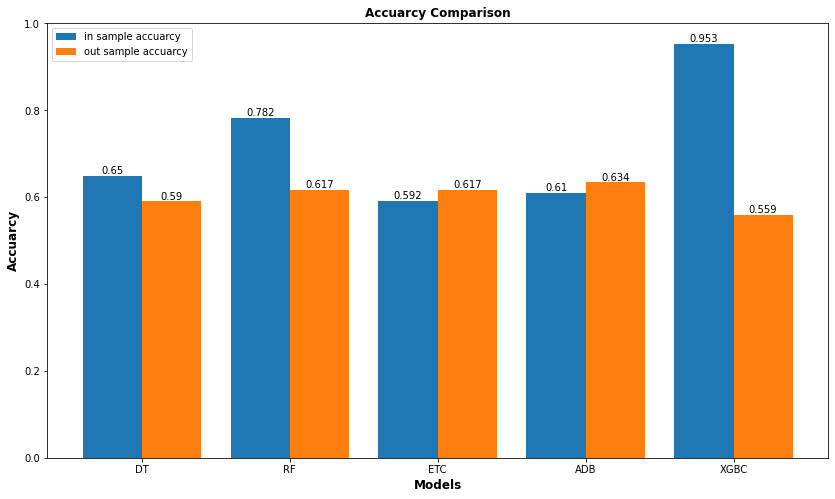

In [243]:
plt.figure(figsize = (14,8))

accuracy_df =pd.DataFrame({'name':names,'accuracy_is':is_results,'accuracy_os':os_results}).set_index('name')
x_axis = np.arange(len(accuracy_df))

barplot_is_accuarcy = plt.bar(x_axis-0.2, accuracy_df['accuracy_is'], 0.4, label='in sample accuarcy')
barplot_os_accuarcy = plt.bar(x_axis+0.2, accuracy_df['accuracy_os'], 0.4, label='out sample accuarcy')

plt.bar_label(barplot_is_accuarcy, labels = np.round(accuracy_df['accuracy_is'],3))
plt.bar_label(barplot_os_accuarcy, labels = np.round(accuracy_df['accuracy_os'],3))

plt.xticks(x_axis, accuracy_df.index)
plt.xlabel("Models", fontsize = 12, fontweight = "bold") 
plt.ylabel("Accuarcy",fontsize = 12, fontweight = "bold")
plt.title("Accuarcy Comparison", fontsize = 12, fontweight = "bold")
plt.legend()
plt.show()

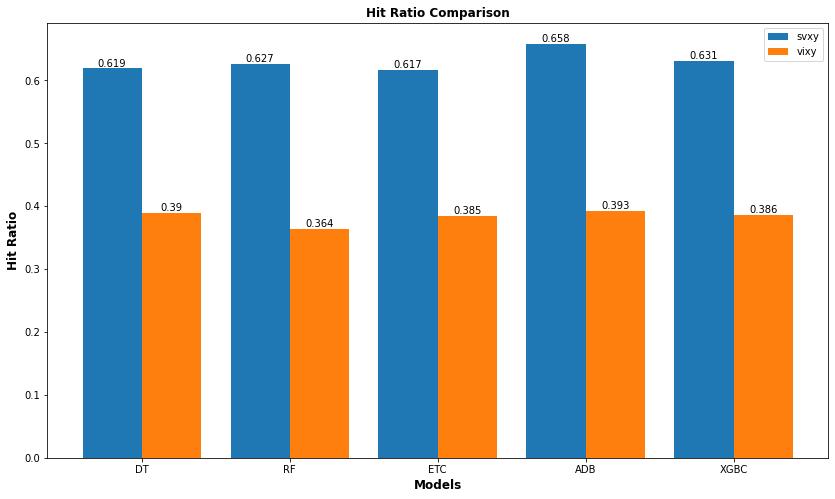

In [245]:
plt.figure(figsize = (14,8))

hit_df =pd.DataFrame({'name':names,'svxy':svxy_results,'vixy':vixy_results}).set_index('name')
x_axis = np.arange(len(hit_df))

barplot_svxy_hit = plt.bar(x_axis-0.2, hit_df['svxy'], 0.4, label='svxy')
barplot_vixy_hit = plt.bar(x_axis+0.2, hit_df['vixy'], 0.4, label='vixy')

plt.bar_label(barplot_svxy_hit, labels = np.round(hit_df['svxy'],3))
plt.bar_label(barplot_vixy_hit, labels = np.round(hit_df['vixy'],3))

plt.xticks(x_axis, hit_df.index)
plt.xlabel("Models", fontsize = 12, fontweight = "bold") 
plt.ylabel("Hit Ratio",fontsize = 12, fontweight = "bold")
plt.title("Hit Ratio Comparison", fontsize = 12, fontweight = "bold")
plt.legend()
plt.show()

### We select Dicision to forest test set

In [343]:
DT = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split= 4).fit(X_train, Y_train)
y_pred_DT = DT.predict(X_test)
pd.DataFrame({'ycap':y_pred_DT},index=Y_test.index).to_csv('DT_tree.csv')

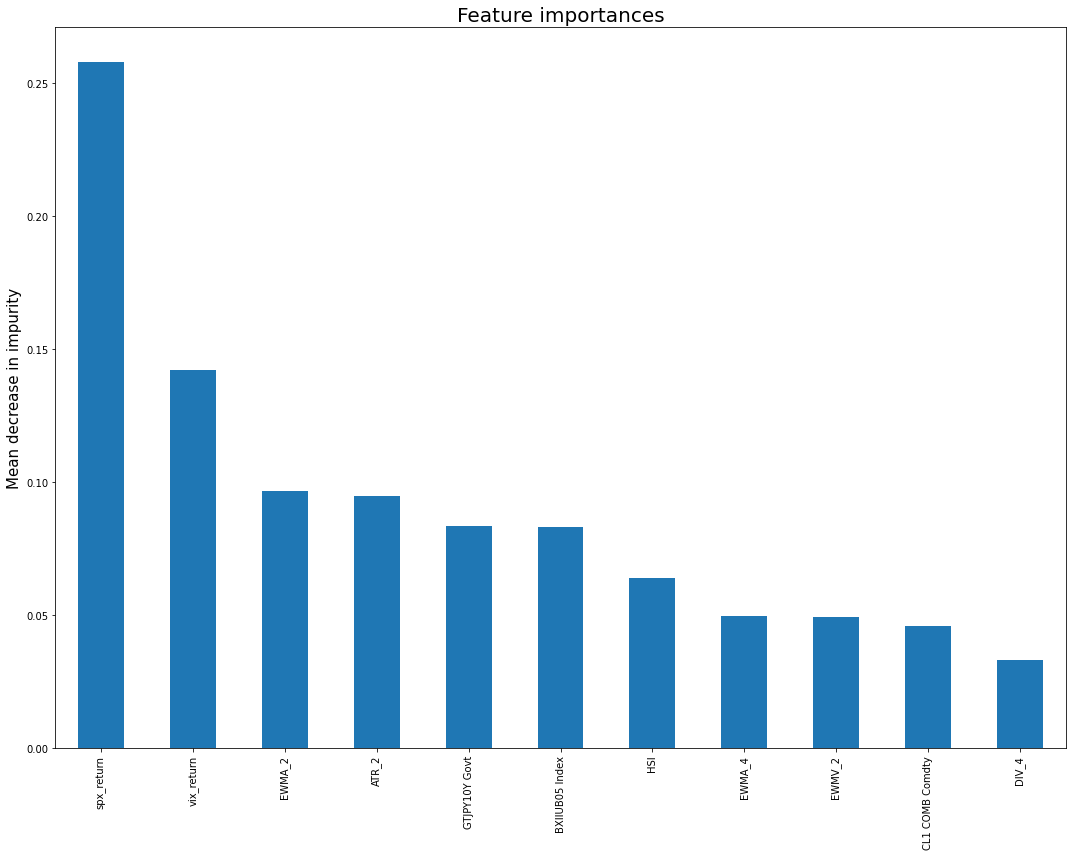

In [339]:
forest_importances = pd.Series(DT.feature_importances_,index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(15,12))
forest_importances[forest_importances >0].plot.bar(ax=ax)
ax.set_title("Feature importances",fontsize=20) 
ax.set_ylabel("Mean decrease in impurity",fontsize=15)
fig.tight_layout()